Name: John Lloyd Renzo R. Castillo

Instructor: Engr. Roman Richard

Course/Section: CPE019-CPE32S1


In [1]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout



2023-03-23 19:21:32.582414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [3]:
data


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


Convert the pixels into floating-point values.

In [5]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize image pixel values by dividing
# by 255
gray_scale = 255
x_train /= gray_scale # x_train = x_train/ 255
x_test /= gray_scale


We are converting the pixel values into floating-point values to make the predictions. Changing the numbers into grayscale values will be beneficial as the values become small and the computation becomes easier and faster. As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1

In [6]:
# Understand the structure of the dataset

print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)


Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


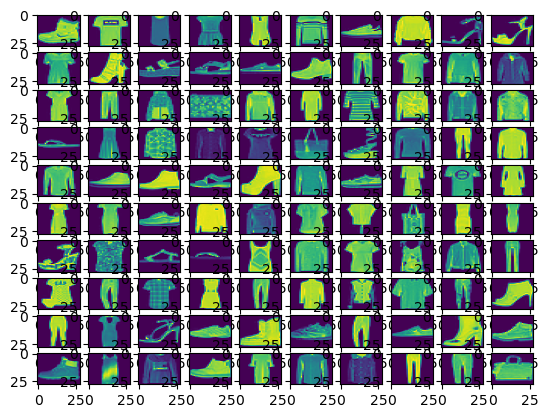

In [7]:
# Data visualization

fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
	for j in range(10):
		ax[i][j].imshow(x_train[k].reshape(28, 28, 1),
						aspect='auto')
		k += 1
plt.show()


In [8]:
# Form the Input, hidden, and output layers.

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


2023-03-23 19:23:59.451501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

**Some important points to note:**

The **Sequential model** allows us to create models layer-by-layer as we need in a multi-layer perceptron and is limited to single-input, single-output stacks of layers.

**Flatten** flattens the input provided without affecting the batch size. For example, If inputs are shaped (batch_size,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch_size, 1).

**Activation** is for using the sigmoid activation function.

The first two **Dense layers** are used to make a fully connected model and are the hidden layers.

The last Dense layer is the **output layer** which contains 10 neurons that decide which category the image belongs to.

In [10]:
# Compile the model

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy', 
			metrics=['accuracy'])


**Compile function** is used here that involves the use of loss, optimizers, and metrics. Here loss function used is **sparse_categorical_crossentropy**, optimizer used is **adam**.

In [11]:
# Fit the model

model.fit(x_train, y_train, epochs=20,
		batch_size=64,
		validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 64s 79ms/step - loss: 0.5648 - accuracy: 0.8000 - val_loss: 0.3620 - val_accuracy: 0.8688
Epoch 2/20
750/750 [==============================] - 56s 75ms/step - loss: 0.3836 - accuracy: 0.8639 - val_loss: 0.3055 - val_accuracy: 0.8898
Epoch 3/20
750/750 [==============================] - 51s 68ms/step - loss: 0.3367 - accuracy: 0.8805 - val_loss: 0.2797 - val_accuracy: 0.9012
Epoch 4/20
750/750 [==============================] - 49s 65ms/step - loss: 0.3103 - accuracy: 0.8871 - val_loss: 0.2700 - val_accuracy: 0.9020
Epoch 5/20
750/750 [==============================] - 48s 64ms/step - loss: 0.2908 - accuracy: 0.8946 - val_loss: 0.2589 - val_accuracy: 0.9036
Epoch 6/20
750/750 [==============================] - 47s 63ms/step - loss: 0.2792 - accuracy: 0.8992 - val_loss: 0.2499 - val_accuracy: 0.9083
Epoch 7/20
750/750 [==============================] - 48s 64ms/step - loss: 0.2678 - accuracy: 0.9013 - val_loss: 0.2484 - val_accuracy:

**Some important points to note:**

**Epochs** tell us the number of times the model will be trained in forwarding and backward passes.

**Batch Size** represents the number of samples, If it’s unspecified, batch_size will default to 32.

**Validation Split** is a float value between 0 and 1. The model will set apart this fraction of the training data to evaluate the loss and any model metrics at the end of each epoch. (The model will not be trained on this data)

In [12]:
# Find the accuracy of the model

results = model.evaluate(x_test, y_test, verbose = 1)
print('test loss, test acc:', results)


313/313 [==============================] - 3s 8ms/step - loss: 0.2563 - accuracy: 0.9112
test loss, test acc: [0.25630149245262146, 0.9111999869346619]


We got the **accuracy** of our model 91% by using ```model.evaluate()``` on the test samples.

# Source:

https://keras.io/api/datasets/fashion_mnist/